In [112]:
import pandas as pd

In [113]:
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

In [114]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [116]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [117]:
df.shape
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [118]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt 

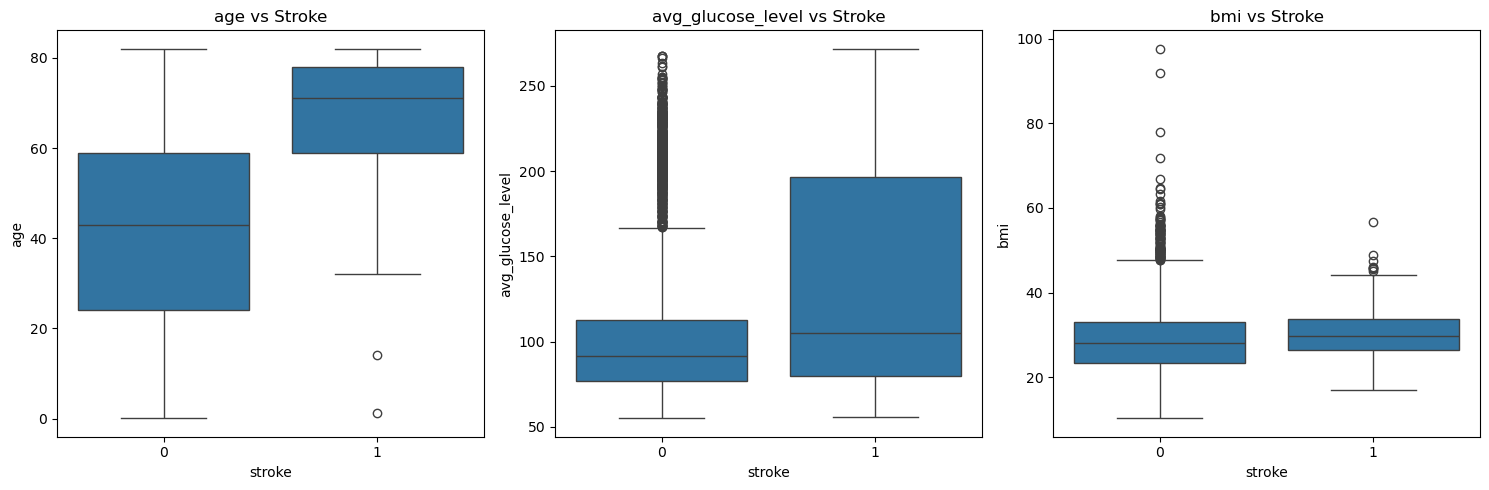

In [120]:
numerical_cols = ['age','avg_glucose_level','bmi']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f"{col} vs Stroke")
plt.tight_layout()
plt.show()

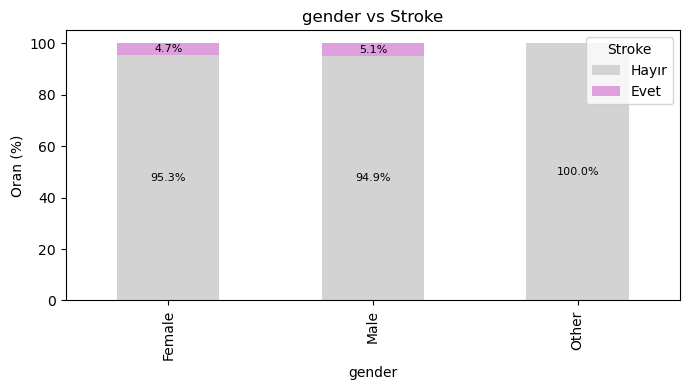

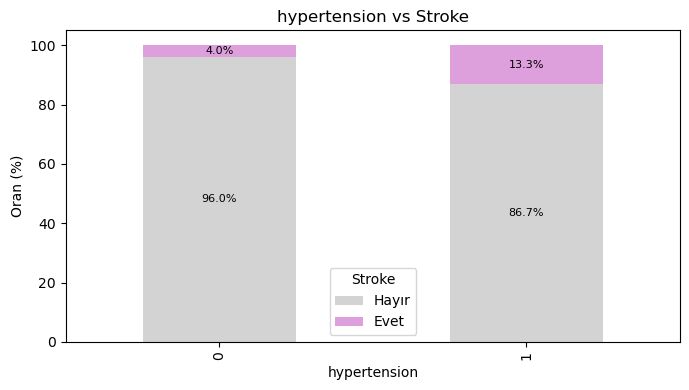

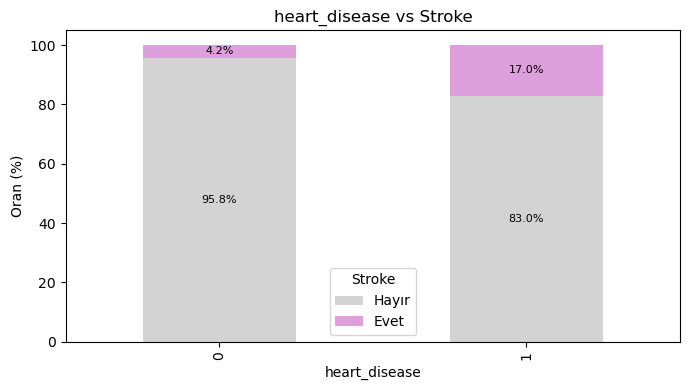

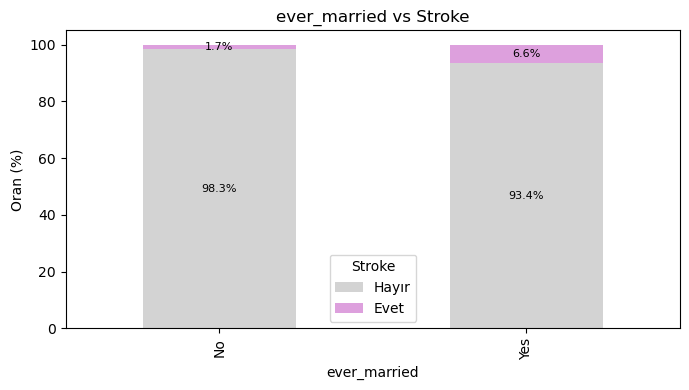

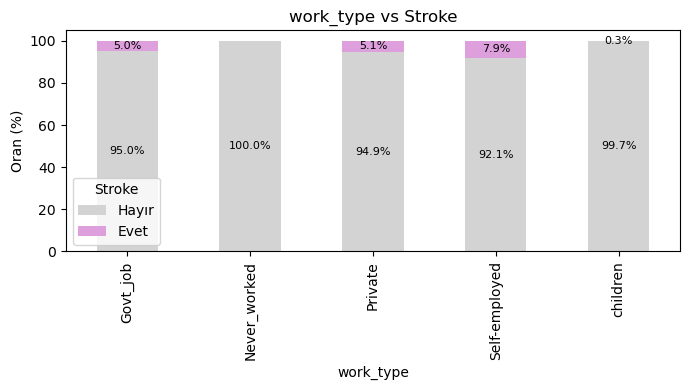

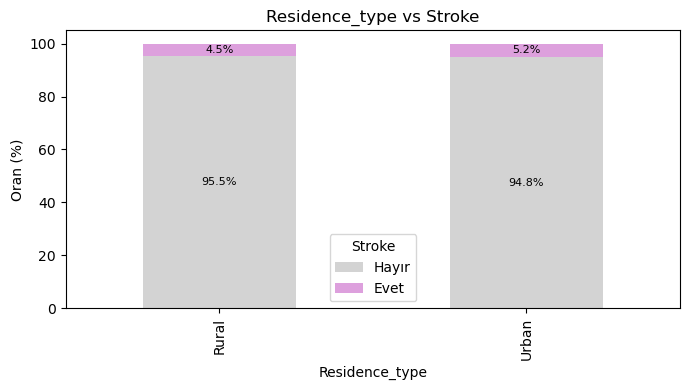

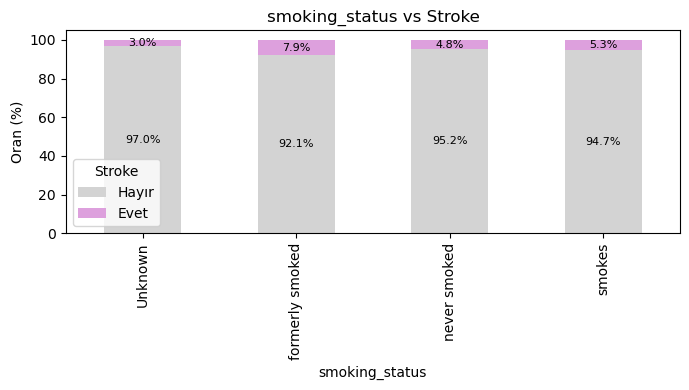

In [121]:
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status']
colors = [ '#D3D3D3','#DDA0DD']

for col in categorical_cols:
    
    ctab = pd.crosstab(df[col], df["stroke"], normalize='index') * 100 

    
    ax = ctab.plot(kind='bar', stacked=True, figsize=(7, 4), color=colors)
    plt.title(f"{col} vs Stroke")
    plt.ylabel("Oran (%)")
    plt.xlabel(col)
    plt.legend(title="Stroke", labels=["Hayır", "Evet"])

    
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%', 
                        (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                        ha='center', va='center', fontsize=8, color='black')

    plt.tight_layout()
    plt.show()

In [122]:
df = df.drop(columns=["id"])

In [123]:
df["bmi"] = df["bmi"].fillna(df["bmi"].mean())

In [124]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

binary_cols = ["gender","ever_married","Residence_type"]

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [125]:
df = pd.get_dummies(df, columns=["work_type", "smoking_status"], drop_first=True)
print(df.head())


   gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0       1  67.0             0              1             1               1   
1       0  61.0             0              0             1               0   
2       1  80.0             0              1             1               0   
3       0  49.0             0              0             1               1   
4       0  79.0             1              0             1               0   

   avg_glucose_level        bmi  stroke  work_type_Never_worked  \
0             228.69  36.600000       1                   False   
1             202.21  28.893237       1                   False   
2             105.92  32.500000       1                   False   
3             171.23  34.400000       1                   False   
4             174.12  24.000000       1                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0               True                    False              

In [152]:
df[['work_type_Private', 'work_type_Self-employed', 'smoking_status_never smoked']] = \
    df[['work_type_Private', 'work_type_Self-employed', 'smoking_status_never smoked']].astype(int)
print(df.head())


   gender       age  hypertension  heart_disease  ever_married  \
0       1  1.051434             0              1             1   
1       0  0.786070             0              0             1   
2       1  1.626390             0              1             1   
3       0  0.255342             0              0             1   
4       0  1.582163             1              0             1   

   Residence_type  avg_glucose_level           bmi  stroke  \
0               1           2.706375  1.001234e+00       1   
1               0           2.121559  4.615554e-16       1   
2               0          -0.005028  4.685773e-01       1   
3               1           1.437358  7.154182e-01       1   
4               0           1.501184 -6.357112e-01       1   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False                  1                        0   
1                   False                  0                        1   
2          

In [153]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
print(df.head())

   gender       age  hypertension  heart_disease  ever_married  \
0       1  1.051434             0              1             1   
1       0  0.786070             0              0             1   
2       1  1.626390             0              1             1   
3       0  0.255342             0              0             1   
4       0  1.582163             1              0             1   

   Residence_type  avg_glucose_level           bmi  stroke  \
0               1           2.706375  1.001234e+00       1   
1               0           2.121559  4.615554e-16       1   
2               0          -0.005028  4.685773e-01       1   
3               1           1.437358  7.154182e-01       1   
4               0           1.501184 -6.357112e-01       1   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1                       0                  0                        1   
2          

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["age", "avg_glucose_level", "bmi"]] = scaler.fit_transform(df[["age", "avg_glucose_level", "bmi"]])
print(df.head())


   gender       age  hypertension  heart_disease  ever_married  \
0       1  1.051434             0              1             1   
1       0  0.786070             0              0             1   
2       1  1.626390             0              1             1   
3       0  0.255342             0              0             1   
4       0  1.582163             1              0             1   

   Residence_type  avg_glucose_level           bmi  stroke  \
0               1           2.706375  1.001234e+00       1   
1               0           2.121559  4.254025e-16       1   
2               0          -0.005028  4.685773e-01       1   
3               1           1.437358  7.154182e-01       1   
4               0           1.501184 -6.357112e-01       1   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1                       0                  0                        1   
2          

In [156]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["age", "avg_glucose_level", "bmi"]] = scaler.fit_transform(df[["age", "avg_glucose_level", "bmi"]])


In [157]:
X = df.drop("stroke", axis=1)  
y = df["stroke"]               

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [160]:
y_pred = log_model.predict(X_test)


In [161]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[972   0]
 [ 49   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022


Accuracy:
0.952054794520548


In [162]:
log_model = LogisticRegression(class_weight='balanced', max_iter=1000)


In [163]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [164]:
from collections import Counter

print("Orijinal veri:", Counter(y_train))
print("SMOTE sonrası:", Counter(y_resampled))


Orijinal veri: Counter({0: 3889, 1: 199})
SMOTE sonrası: Counter({0: 3889, 1: 3889})


In [165]:
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[738 234]
 [ 11  39]]
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       972
           1       0.14      0.78      0.24        50

    accuracy                           0.76      1022
   macro avg       0.56      0.77      0.55      1022
weighted avg       0.94      0.76      0.83      1022



In [166]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_resampled, y_resampled)  


LogisticRegression(class_weight='balanced', max_iter=1000)

In [167]:
y_probs = log_model.predict_proba(X_test)[:, 1]  


In [168]:
threshold = 0.3 
y_pred_custom = (y_probs >= threshold).astype(int)


In [169]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))
print("\nAccuracy:", accuracy_score(y_test, y_pred_custom))


Confusion Matrix:
 [[610 362]
 [  9  41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.63      0.77       972
           1       0.10      0.82      0.18        50

    accuracy                           0.64      1022
   macro avg       0.54      0.72      0.47      1022
weighted avg       0.94      0.64      0.74      1022


Accuracy: 0.636986301369863


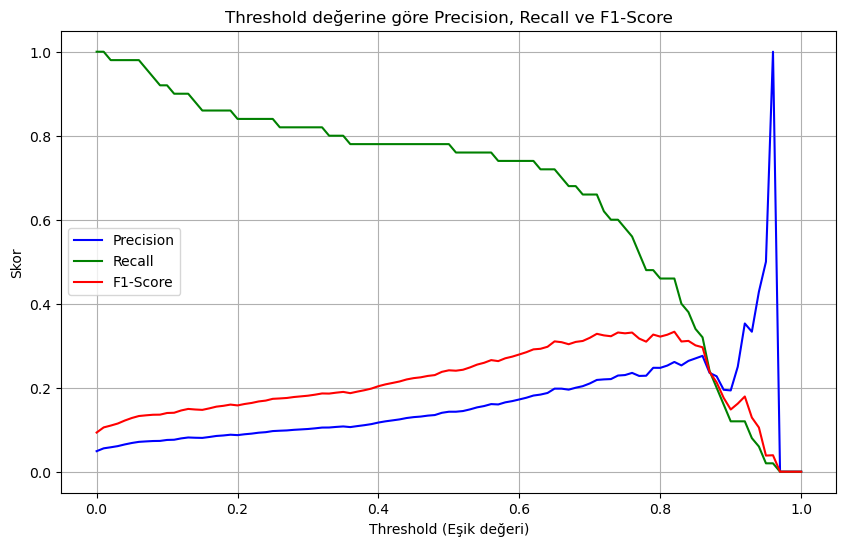

In [170]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Modelden olasılıkları al
y_probs = log_model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0, 1.01, 0.01)

precisions = []
recalls = []
f1s = []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_thresh, zero_division=0))
    f1s.append(f1_score(y_test, y_pred_thresh, zero_division=0))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision", color="blue")
plt.plot(thresholds, recalls, label="Recall", color="green")
plt.plot(thresholds, f1s, label="F1-Score", color="red")
plt.xlabel("Threshold (Eşik değeri)")
plt.ylabel("Skor")
plt.title("Threshold değerine göre Precision, Recall ve F1-Score")
plt.legend()
plt.grid(True)
plt.show()


In [172]:
best_threshold = 0.82  # grafikten belirlediğin eşik

y_pred_best = (y_probs >= best_threshold).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))


Confusion Matrix:
 [[907  65]
 [ 27  23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       972
           1       0.26      0.46      0.33        50

    accuracy                           0.91      1022
   macro avg       0.62      0.70      0.64      1022
weighted avg       0.94      0.91      0.92      1022

Accuracy: 0.9099804305283757


In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_resampled, y_resampled)

y_pred = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[900  72]
 [ 43   7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       972
           1       0.09      0.14      0.11        50

    accuracy                           0.89      1022
   macro avg       0.52      0.53      0.52      1022
weighted avg       0.91      0.89      0.90      1022


Accuracy: 0.8874755381604696


In [174]:
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Sınıf 1'in (felç geçiren) olasılıkları


In [175]:
threshold = 0.25
y_pred_threshold = (y_probs >= threshold).astype(int)


In [176]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_threshold))
print("\nClassification Report:\n", classification_report(y_test, y_pred_threshold))
print("\nAccuracy:", accuracy_score(y_test, y_pred_threshold))


Confusion Matrix:
 [[760 212]
 [ 16  34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87       972
           1       0.14      0.68      0.23        50

    accuracy                           0.78      1022
   macro avg       0.56      0.73      0.55      1022
weighted avg       0.94      0.78      0.84      1022


Accuracy: 0.776908023483366
